# DataCamp - Associate Data Scientist in Python

# Project - Predicting Movie Rental Durations

In [3]:
# load data folder
data_folder = "/Users/miguelbaptista/Library/CloudStorage/OneDrive-Personal/Data_Science/Python/MOOC/DataCamp/ficheiros_2/"

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

A DVD rental company needs your help! 

They want to figure out **how many days a customer will rent a DVD for** based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a **MSE of 3 or less on a test set**. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file rental_info.csv. It has the following features:

- "rental_date": The date (and time) the customer rents the DVD.
- "return_date": The date (and time) the customer returns the DVD.
- "amount": The amount paid by the customer for renting the DVD.
- "amount_2": The square of "amount".
- "rental_rate": The rate at which the DVD is rented for.
- "rental_rate_2": The square of "rental_rate".
- "release_year": The year the movie being rented was released.
- "length": Lenght of the movie being rented, in minuites.
- "length_2": The square of "length".
- "replacement_cost": The amount it will cost the company to replace the DVD.
- "special_features": Any special features, for example trailers/deleted scenes that the DVD also has.
- "NC-17", "PG", "PG-13", "R": These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.
  

In this project, you will use regression models to predict the number of days a customer rents DVDs for.

As with most data science projects, you will need to pre-process the data provided, in this case, a csv file called rental_info.csv. Specifically, you need to:

1) Read in the csv file rental_info.csv using pandas.
2) Create a column named "rental_length_days" using the columns "return_date" and "rental_date", and add it to the pandas DataFrame. This column should contain information on how many days a DVD has been rented by a customer.
3) Create two columns of dummy variables from "special_features", which takes the value of 1 when:
     - The value is "Deleted Scenes", storing as a column called "deleted_scenes".
     - The value is "Behind the Scenes", storing as a column called "behind_the_scenes".

  
4) Make a pandas DataFrame called X containing all the appropriate features you can use to run the regression models, avoiding columns that leak data about the target.
5) Choose the "rental_length_days" as the target column and save it as a pandas Series called y.
Following the preprocessing you will need to:

    -  Split the data into X_train, y_train, X_test, and y_test train and test sets, avoiding any features that leak data about the target variable, and include 20% of the total data in the test set.
    -  Set random_state to 9 whenever you use a function/method involving randomness, for example, when doing a test-train split.
6) Recommend a model yielding a mean squared error (MSE) less than 3 on the test set

7) Save the model you would recommend as a variable named best_model, and save its MSE on the test set as best_mse.

In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import any additional modules and start coding below
from sklearn.linear_model import LinearRegression, LogisticRegression #LogisticRegression is usually for classification, but can be for r
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from datetime import datetime
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

1) Read in the csv file rental_info.csv using pandas.

In [9]:
# load course files
rental_info = pd.read_csv(data_folder + "rental_info.csv")

print(rental_info.shape)
rental_info.head()

(15861, 15)


,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


2) Create a column named "rental_length_days" using the columns "return_date" and "rental_date", and add it to the pandas DataFrame. This column should contain information on how many days a DVD has been rented by a customer.

In [11]:
# Columns "rental_date" and "return_date" transformations

# convert to datetime
rental_date_alt = rental_info["rental_date"].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))
return_date_alt = rental_info["return_date"].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))

# Create Target column: how many days a DVD has been rented by a customer
rental_info["rental_length_days"] = (return_date_alt - rental_date_alt).dt.days
rental_info["rental_length_days"]

0        3
1        3
2        7
3        2
4        4
        ..
15856    7
15857    4
15858    9
15859    8
15860    6
Name: rental_length_days, Length: 15861, dtype: int64

3) Create two columns of dummy variables from "special_features", which takes the value of 1 when:
     - The value is "Deleted Scenes", storing as a column called "deleted_scenes".
     - The value is "Behind the Scenes", storing as a column called "behind_the_scenes".


In [13]:
# Columns "special_features" transformations

# Column special_features_behind
rental_info["special_features_behind"] = [1 if "Behind the Scenes" in i else 0 for i in rental_info["special_features"]]

# Column special_features_deleted
rental_info["special_features_deleted"] = [1 if "Deleted Scenes" in i else 0 for i in rental_info["special_features"]]


4) Make a pandas DataFrame called X containing all the appropriate features you can use to run the regression models, avoiding columns that leak data about the target.

In [15]:
rental_info.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length_days,special_features_behind,special_features_deleted
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3,1,0
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3,1,0
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7,1,0
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2,1,0
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,4,1,0


In [16]:
# Define X
X = rental_info.drop(['rental_length_days', "special_features", "rental_date", "return_date"], axis=1).values
X

array([[2.99000e+00, 2.00500e+03, 2.99000e+00, ..., 8.94010e+00,
        1.00000e+00, 0.00000e+00],
       [2.99000e+00, 2.00500e+03, 2.99000e+00, ..., 8.94010e+00,
        1.00000e+00, 0.00000e+00],
       [2.99000e+00, 2.00500e+03, 2.99000e+00, ..., 8.94010e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [8.99000e+00, 2.00900e+03, 4.99000e+00, ..., 2.49001e+01,
        1.00000e+00, 1.00000e+00],
       [7.99000e+00, 2.00900e+03, 4.99000e+00, ..., 2.49001e+01,
        1.00000e+00, 1.00000e+00],
       [5.99000e+00, 2.00900e+03, 4.99000e+00, ..., 2.49001e+01,
        1.00000e+00, 1.00000e+00]])

5) Choose the "rental_length_days" as the target column and save it as a pandas Series called y. Following the preprocessing you will need to:

    - Split the data into X_train, y_train, X_test, and y_test train and test sets, avoiding any features that leak data about the target variable, and include 20% of the total data in the test set.
    - Set random_state to 9 whenever you use a function/method involving randomness, for example, when doing a test-train split.

In [18]:
# Target variable
y = rental_info["rental_length_days"].values

# train test split 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=9)


6) Recommend a model yielding a mean squared error (MSE) less than 3 on the test set

In [20]:
import warnings
    
# Seed
SEED = 9

# Models to test
models = {"Linear Regression": LinearRegression(n_jobs=-1),
          "Logistic Regression": LogisticRegression(random_state=SEED, n_jobs=-1, max_iter=50),
          "Ridge": Ridge(random_state=SEED),
          "Lasso": Lasso(random_state=SEED),
          "Decision Tree Regressor": DecisionTreeRegressor(random_state=SEED),
          "Bagging Regressor": BaggingRegressor(random_state=SEED, n_jobs=-1),
          "Random Forest Regressor": RandomForestRegressor(random_state=SEED, n_jobs=-1),
          "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=SEED),
          "Stochastic Gradient Boosting Regressor": GradientBoostingRegressor(subsample=0.8, random_state=SEED),
         }

results = []
# loop the models
for name, model in tqdm(models.items()):

    # Create steps 
    # steps = [("{}".format(name), model)]  # ("scaler", StandardScaler()),

    # Set up pipeline
    # pipeline = Pipeline(steps)
    if name == "Linear Regression":
        params = {}
        
    elif name == "Logistic Regression":
        params = {"solver": ["newton-cg", "lbfgs"], 
                  "C": np.linspace(0.001, 1.0, 20)}

    elif name == "Ridge":
        params = {"alpha": np.linspace(0.0001, 1, 20),
                  "solver": ["sag", "lsqr"]}

    elif name == "Lasso":
        params = {"alpha": np.linspace(0.00001, 1, 20)}

    elif name == "Decision Tree Regressor":
        params = {'max_depth': [4, 6, 8], 
                  'min_samples_leaf': [0.5, 1], 
                  'max_features': [0.4, 0.6, 0.8, 1]}

    elif name == "Bagging Regressor":
        params = {"n_estimators": [10, 15], 
                  "max_features": [0.2, 0.5, 1]}

    elif name == "Random Forest Regressor":
        params = {'n_estimators': [300, 100], 
                  'max_depth': [4, 6, 8], 
                  'min_samples_leaf': [0.2, 0.5, 1],
                  'max_features': ['log2', 'sqrt']}

    elif name == "Gradient Boosting Regressor":
        params = {"n_estimators": [100, 400, 500], 
                  "max_depth": [3, 4, 6]}

    elif name == "Stochastic Gradient Boosting Regressor":
        params = {"n_estimators": [100, 400, 500], 
                  "max_depth": [3, 4, 6]}

    # Create the GridSearchCV object
    tuning = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    tuning.fit(X_train, y_train)
    best_hyperparams = tuning.best_params_
    best_model = tuning.best_estimator_
    y_pred = best_model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    
    # Compute and print performance
    print("Tuned {} Parameters: {}, MSE: {}".format(name, best_hyperparams, MSE))
    
    results.append((name, MSE, best_model))



 11%|█████                                        | 1/9 [00:00<00:04,  1.69it/s]

Tuned Linear Regression Parameters: {}, MSE: 2.826202099706255


/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Tuned Logistic Regression Parameters: {'C': 0.6845263157894736, 'solver': 'newton-cg'}, MSE: 3.065868263473054


/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

Tuned Ridge Parameters: {'alpha': 1.0, 'solver': 'lsqr'}, MSE: 3.6450815994215535


 44%|████████████████████                         | 4/9 [00:15<00:18,  3.68s/it]

Tuned Lasso Parameters: {'alpha': 1e-05}, MSE: 2.8262021213480875


 56%|█████████████████████████                    | 5/9 [00:16<00:09,  2.44s/it]

Tuned Decision Tree Regressor Parameters: {'max_depth': 8, 'max_features': 0.6, 'min_samples_leaf': 1}, MSE: 2.375942821096304


 67%|██████████████████████████████               | 6/9 [00:16<00:05,  1.79s/it]

Tuned Bagging Regressor Parameters: {'max_features': 0.5, 'n_estimators': 10}, MSE: 2.2884804269624195


 78%|███████████████████████████████████          | 7/9 [00:21<00:05,  2.90s/it]

Tuned Random Forest Regressor Parameters: {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100}, MSE: 2.3930511908106578


 89%|████████████████████████████████████████     | 8/9 [00:36<00:06,  6.66s/it]

Tuned Gradient Boosting Regressor Parameters: {'max_depth': 6, 'n_estimators': 400}, MSE: 1.8045542349128862


100%|█████████████████████████████████████████████| 9/9 [00:49<00:00,  5.52s/it]

Tuned Stochastic Gradient Boosting Regressor Parameters: {'max_depth': 6, 'n_estimators': 400}, MSE: 1.779833672616384


In [21]:
[i[:2] for i in results]

[('Linear Regression', 2.826202099706255),
 ('Logistic Regression', 3.065868263473054),
 ('Ridge', 3.6450815994215535),
 ('Lasso', 2.8262021213480875),
 ('Decision Tree Regressor', 2.375942821096304),
 ('Bagging Regressor', 2.2884804269624195),
 ('Random Forest Regressor', 2.3930511908106578),
 ('Gradient Boosting Regressor', 1.8045542349128862),
 ('Stochastic Gradient Boosting Regressor', 1.779833672616384)]

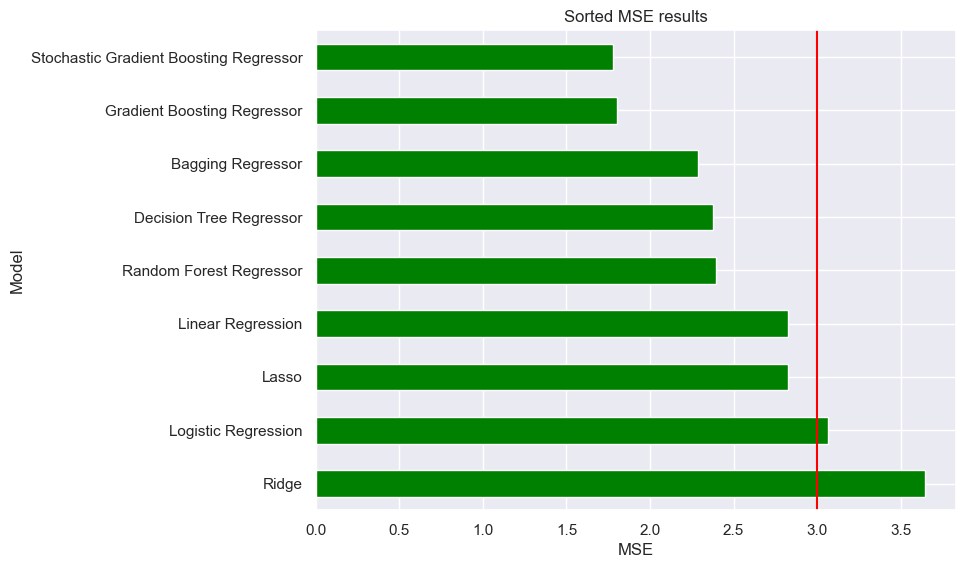

In [22]:
# Visualize
results_sorted = pd.Series([i[1] for i in results], index = [i[0] for i in results])                                  
results_sorted = results_sorted.sort_values(ascending=False)       

# Make a horizontal bar plot
results_sorted.plot(kind='barh', color='green')
plt.title("Sorted MSE results")
plt.ylabel("Model")
plt.xlabel("MSE")
plt.axvline(x=3, color='red')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

7) Save the model you would recommend as a variable named best_model, and save its MSE on the test set as best_mse.

In [24]:
# min MSE
results[[i[1] for i in results].index(min([i[1] for i in results]))]

('Stochastic Gradient Boosting Regressor',
 1.779833672616384,
 GradientBoostingRegressor(max_depth=6, n_estimators=400, random_state=9,
                           subsample=0.8))

In [25]:
# Best model
best_model = results[[i[1] for i in results].index(min([i[1] for i in results]))][-1]
display(best_model)

GradientBoostingRegressor(max_depth=6, n_estimators=400, random_state=9,
                          subsample=0.8)

In [26]:
# Best MSE
best_mse = results[[i[1] for i in results].index(min([i[1] for i in results]))][1]
display(best_mse)

1.779833672616384